# Using color in your visualizations
> Color is a powerful tool for encoded values in data visualization. However, with this power comes danger. In this chapter, we talk about how to choose an appropriate color palette for your visualization based upon the type of data it is showing. This is the Summary of lecture "Improving Your Data Visualizations in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Visualization]
- image: images/city_heatmap.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Color in visualizations
- How color is used
    - Differentiates classes of data
    - Encodes continuous values
    - Should be used carefully
- Color can be misleading...
> "It is evident that the color-size illusion is present in a marked degree (no matter what) arrangement" - C.J Warden & E.L. Flynn, 1926

### Getting rid of unnecessary color
You might want to compare the relationship CO to NO2 values across cities using a simple scatter plot with color to differentiate the different cities' data.


In [2]:
pollution = pd.read_csv('./dataset/pollution_wide.csv')
pollution.head()

city  year  month  day     CO   NO2     O3    SO2
0  Cincinnati  2012      1    1  0.245  20.0  0.030   4.20
1  Cincinnati  2012      1    2  0.185   9.0  0.025   6.35
2  Cincinnati  2012      1    3  0.335  31.0  0.025   4.25
3  Cincinnati  2012      1    4  0.305  25.0  0.016  17.15
4  Cincinnati  2012      1    5  0.345  21.0  0.016  11.05

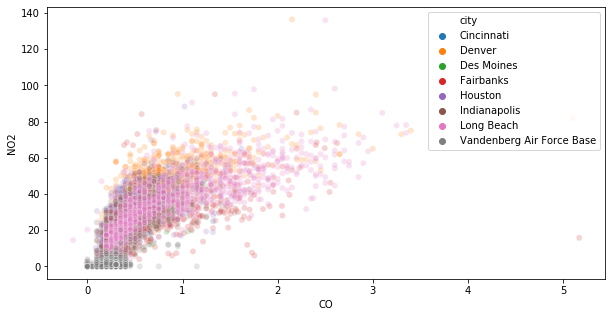

In [3]:
sns.scatterplot('CO', 'NO2',
                alpha = 0.2,
                hue = 'city',
                data = pollution);

Unfortunately, the resulting plot is very convoluted. It's hard to make out differences between the cities because one has to differentiate between similar colors. It turns out that sometimes the best color palette for your plot is no color at all.

To remedy this hard-to-read chart, get rid of the color component and facet by each city. While the resulting plot may not be as pretty, it will be a much better tool to decipher the differences.

In [4]:
# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2);

This new faceted plot removes the pretty colors but becomes a whole lot more informative. In certain situations, if you can take something that is encoded in color and encode it in position instead, you often will increase the legibility of your chart. The balance between attractiveness and utility is something you need to balance in every plot you make.

### Fixing Seaborn's bar charts
Seaborn's default values for the colors of bars in a bar chart are not ideal for the most accurate perception. By drawing each bar as a different color, there is a risk of the viewer seeing two identical sized bars as different sizes as people tend to see some colors as 'larger' than others.

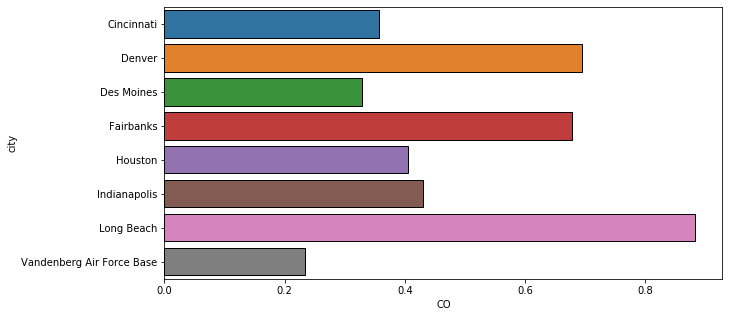

In [5]:
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Add a border to the bars
            edgecolor = 'black');

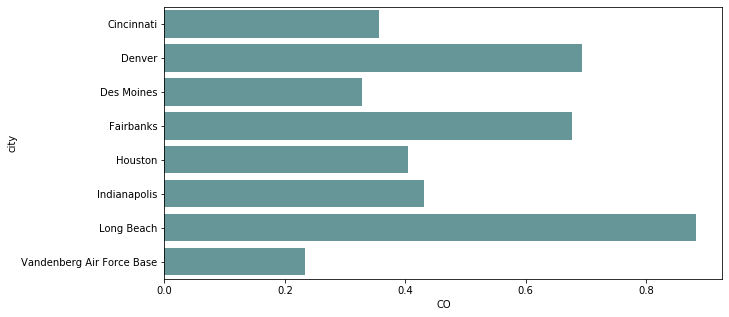

In [6]:
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Replace border with bar colors
            color = 'cadetblue');

Adding borders is an easy and quick way to improve default bar charts without sacrificing some of the trippy colors. Spending a tiny bit more time to adjust the default colors will result in a more accurate and easy to read chart.

## Continuous color palettes
- Continuous 
    - Ordered
    - Lots of possible values \
    (e.g. Distances, Sensor Readings, Volumes)
- Not Continuous
    - No order or.
    - Few possible values
    (e.g. Categories, Relative Scales, Binary Values)

### Making a custom continuous palette
You are interested in the pollution levels of Cincinnati for the year 2014. Specifically, you're interested in CO and NO2, so you make a simple scatter plot to show the relationship between the two pollutants.

In [7]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

In [8]:
sns.scatterplot(x='CO', y='NO2', data=cinci_2014);

However, there may be some interesting information in how the value of O3 relates to the two plotted pollutants, so you decide to color the points by their O3 levels. To do this, you need to define an appropriate continuous palette and map your O3 column to it in your scatter plot.

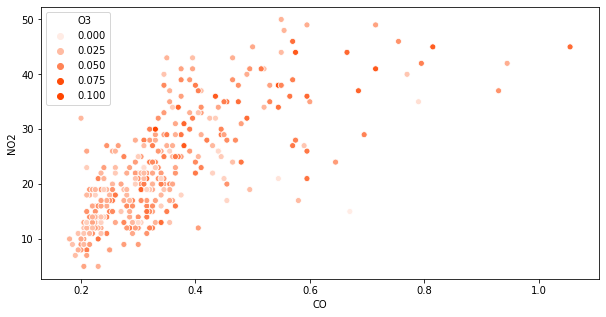

In [9]:
# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                         as_cmap = True);

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette);

Judging by the plot, there doesn't appear to be much of an association of $O_3$ to either $CO$ or $NO_2$. By adding color to this simple scatter plot, you added a large amount of information on a previously un-visualized variable to the chart while still maintaining high precision in your main goal of comparing the $CO$ and $NO_2$ values to each other.

### Customizing a diverging palette heatmap
The default color scheme used by Seaborn's `heatmap()` doesn't give the value of 0 any special treatment. This is fine for instances when 0 isn't special for the variable you're visualizing but means you will need to customize the palette when 0 is special, such as when it represents a neutral value.

For this visualization, you want to compare all the cities against the average pollution value for CO in November 2015. (As is provided in the DataFrame `nov_2015_CO`).

To do this, use a heat map to encode the number of standard deviations away from the average each city's CO pollution was for the day. You'll need to replace the default palette by creating your own custom diverging palette and passing it to the heatmap and informing the function what your neutral value is.

In [10]:
nov_2015_CO = pd.read_csv('./dataset/nov_2015_CO.csv', index_col=0)
nov_2015_CO

0         1         2         3         4  \
city                                                                          
Cincinnati                      NaN       NaN       NaN       NaN       NaN   
Denver                    -0.047979  0.851152 -0.247786 -0.047979 -0.247786   
Fairbanks                 -0.207825 -0.407631  0.811190  0.281702  0.171808   
Houston                   -0.615430 -0.002024 -0.304731 -0.482559 -0.857197   
Indianapolis               0.551441  1.050958  2.049992  0.851152 -0.647400   
Long Beach                 1.750282 -0.247786 -0.347689  0.351635  0.551441   
Vandenberg Air Force Base -1.146917 -1.246820 -1.146917 -0.947110 -0.947110   

                                  5         6         7         8         9  \
city                                                                          
Cincinnati                -0.743307 -0.679369 -0.449591 -0.402636  0.166813   
Denver                    -0.147883  0.651345  0.651345  0.651345  1.650379   
Fairbanks                 -0.487554  0.071905 -0.377660  0.081895  1.160852   
Houston                   -0.597448 -0.906149 -0.886169 -0.226806  0.089888   
Indianapolis              -0.847206 -0.647400  0.151828  0.051924  0.051924   
Long Beach                 1.450572  2.649413  1.950089  0.951055 -0.247786   
Vandenberg Air Force Base -0.947110 -0.947110 -0.947110 -0.747303 -0.747303   

                           ...        20        21        22        23  \
city                       ...                                           
Cincinnati                 ... -0.493548 -0.256777  0.293691  0.432556   
Denver                     ... -0.247786  0.251731  1.750282  0.951055   
Fairbanks                  ...       NaN       NaN       NaN -0.477564   
Houston                    ... -0.744306  0.387600  0.167812 -0.155875   
Indianapolis               ... -0.547496 -0.647400 -0.647400  1.150862   
Long Beach                 ...  3.148930  1.050958  2.049992  1.650379   
Vandenberg Air Force Base  ... -0.947110 -0.847206 -0.747303 -0.847206   

                                 24        25        26        27        28  \
city                                                                          
Cincinnati                -0.114914 -0.750300 -0.770281 -0.674374 -0.919137   
Denver                     0.751248 -0.647400 -0.647400 -0.547496 -0.447593   
Fairbanks                  0.851152 -0.157873  0.861142  0.611383  2.339712   
Houston                   -0.904151 -0.959098 -0.928128 -0.781270 -0.842211   
Indianapolis              -0.547496 -0.847206 -0.847206 -0.947110 -0.947110   
Long Beach                -0.847206  1.150862  0.651345  0.651345  0.551441   
Vandenberg Air Force Base -0.947110 -0.947110 -0.947110 -0.947110 -0.947110   

                                 29  
city                                 
Cincinnati                -0.546497  
Denver                    -0.247786  
Fairbanks                  2.030012  
Houston                   -0.476565  
Indianapolis              -0.647400  
Long Beach                 0.951055  
Vandenberg Air Force Base -0.947110  

[7 rows x 30 columns]

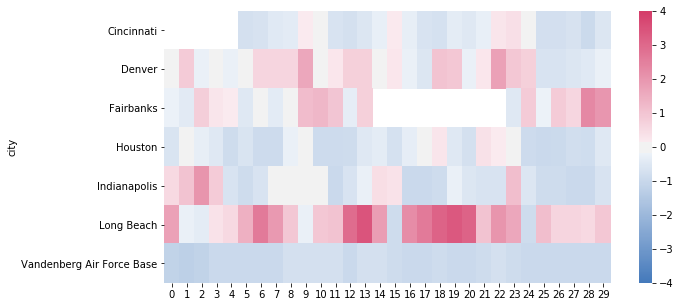

In [11]:
# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap=True)

# Pass palette to plot and set axis ranges
sns.heatmap(nov_2015_CO,
            cmap=color_palette,
            center=0,
            vmin=-4,
            vmax=4
           );
plt.yticks(rotation=0);

Instantly, you can see that Vandenberg Air Force Base always has below average CO values whereas Long Beach, especially towards the end of the month, has much higher than average values. By correctly mapping the zero-point of our values you can immediately pick out patterns in our data in the context of a meaningful data anchor-point.

### Adjusting your palette according to context
You've been asked to make a figure for your company's website. The website has a slick black theme, and it would be pretty jarring if your plot were white. To make your plot match the company aesthetic, you can swap the background to a black one with `plt.style.use("dark_background")`.

The figure you've been asked to make plots O3 values during October 2015 for various cities (provided as oct_2015_o3). You will plot this as a heatmap with the color of each cell encoding how many standard deviations from the overall average O3 value the measurement falls. Due to the website's dark background, you will want to adjust your color palette to encode null value (or 0 standard deviations from the mean) as dark rather than the default white.

In [12]:
oct_2015_o3 = pd.read_csv('./dataset/oct_2015_O3.csv', index_col=0)
oct_2015_o3.head()

0         1         2         3         4         5  \
city                                                                     
Cincinnati -0.570906 -0.648050       NaN       NaN       NaN       NaN   
Denver     -0.185183 -0.185183 -0.185183 -0.493761 -0.262327 -1.728075   
Des Moines -0.378044 -0.185183 -0.185183 -1.033774 -0.725195 -0.725195   
Fairbanks  -0.956629 -1.573786 -1.650931 -1.728075 -1.728075 -2.036654   
Houston     1.049131  1.203420  1.049131  0.817697  0.509119  1.357710   

                   6         7         8         9  ...        21        22  \
city                                                ...                       
Cincinnati       NaN       NaN       NaN       NaN  ...       NaN       NaN   
Denver     -0.108038  0.740553 -0.339472 -0.030894  ... -1.959509 -0.725195   
Des Moines  0.393402  0.316257 -0.069466  0.277685  ... -0.416617 -1.188063   
Fairbanks  -1.573786 -0.725195 -0.802340 -1.110918  ... -1.882364 -1.728075   
Houston     1.897722  1.511999  1.434854  0.971986  ... -0.262327 -0.570906   

                  23        24        25        26        27        28  \
city                                                                     
Cincinnati       NaN       NaN       NaN       NaN       NaN       NaN   
Denver      0.354830  0.431974 -0.648050 -0.030894  0.123396 -1.265207   
Des Moines -0.262327  0.123396 -0.030894 -1.265207       NaN       NaN   
Fairbanks  -2.036654 -1.959509 -2.422377 -2.190943 -1.188063 -1.188063   
Houston    -0.262327 -0.262327 -0.802340 -0.185183  0.509119  1.820577   

                  29        30  
city                            
Cincinnati       NaN       NaN  
Denver     -0.956629  0.277685  
Des Moines       NaN       NaN  
Fairbanks  -0.648050 -0.570906  
Houston     0.046251 -0.879484  

[5 rows x 31 columns]

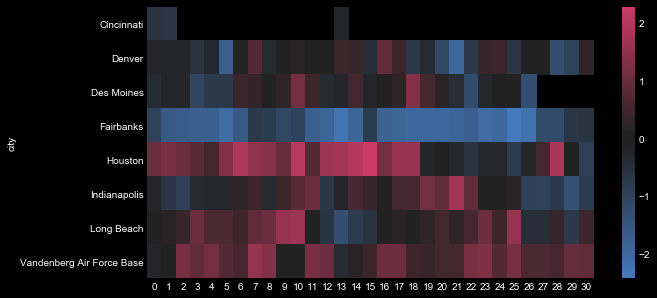

In [21]:
# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(oct_2015_o3,
            cmap = color_palette,
            center = 0);
plt.yticks(rotation = 0);

Not only does the black background make this chart look very cool, it helps the patterns really pop out. Furthermore, matching the null-value to the background of the chart makes it much more natural to read. You can easily see that Fairbanks has much lower than average O3 pollution values than the rest of the cities and that Houston has much higher values, especially in the earlier days of the month.

## Categorical palette
- Ordinal data
    - Has order between classes
    - A set number of distinct classes

### Using a custom categorical palette
When you have a line chart with lots of categories choosing your palette carefully is essential. Often default palettes have very similar hues, that are hard to differentiate when spread over the small surface of a line. ColorBrewer palettes are built with this in mind and keep the colors as distinct as possible.

In this exercise, you will make a line plot of the O3 values over the year of 2013 for all the cities where the color of each line is encoded by city. You will use the ColorBrewer palette `'Set2'` to improve upon the default color scheme.

In [14]:
# Dark plot background
plt.style.use("seaborn-white")

In [15]:
# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year == 2013 & month == 1')

# Color lines by the city and use custom Color Brewer palette
sns.lineplot(x='day', y='CO', hue='city', palette='Set2', linewidth=3, data=pollution_jan13);

By carefully choosing your categorical palettes you can increase the speed and accuracy with which your visualization is read. Here, thanks to the well-separated colors, it is easy to determine that the large spike around 23 days belongs to Denver.

### Dealing with too many categories
Sometimes you may be short on figure space and need to show a lot of data at once. Here you want to show the year-long trajectory of every pollutant for every city in the `pollution` dataset. Each pollutant trajectory will be plotted as a line with the y-value corresponding to standard deviations from year's average. This means you will have a lot of lines on your plot at once -- way more than you could separate clearly with color.

To deal with this, you have decided to highlight on a small subset of city pollutant combinations (`wanted_combos`). This subset is the most important to you, and the other trajectories will provide valuable context for comparison. To focus attention, you will set all the non-highlighted trajectories lines to of the same 'other' color.

In [16]:
city_pol_month = pd.read_csv('./dataset/city_pol_month.csv', index_col=0)
city_pol_month.head()

city_pol  month     value
0  Cincinnati CO      2 -0.470791
1  Cincinnati CO      3 -0.371744
2  Cincinnati CO      4 -0.555778
3  Cincinnati CO      5 -0.496432
4  Cincinnati CO      6 -0.642432

In [17]:
# Choose the combos that get distinct colors
wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

# Assign a new column to DataFrame for isolating the desired combos
city_pol_month['color_cats'] = [x if x in wanted_combos else 'other' for x in city_pol_month['city_pol']]

# Plot lines with color driven by new column and lines driven by original categories
sns.lineplot(x = "month",
             y = "value",
             hue = 'color_cats',
             units = 'city_pol',
             estimator = None,
             palette = 'Set2',
             data = city_pol_month);

Here by subsetting our colors to be those that you care about you can make a bit more sense of the spaghetti of lines. You see that Long Beach has a bathtub shape for its CO values: going from more than four standard deviations above mean CO values to below average and then back up to more than three standard deviations above by the end of the year. Whereas Vandenberg stays way below average for the entire year.

While the best solution for this plot may be to not plot the other lines at all, they can often provide valuable context for the data of interest.

### Coloring ordinal categories
You are working for the Des Moines city council to assess the associations of various pollutant levels in the city. The two most important pollutants are $SO_2$ and $NO_2$ but CO is also of interest. You've only been allowed enough space for a single plot for your part of the report.

You start with a scatter plot of the $SO_2$ and $NO_2$ values as they are most important and then decide to show the CO values using a color scale corresponding to CO quartiles. By binning the continuous CO values, you have turned CO into an ordinal variable that can illuminate broad patterns without requiring much effort from the viewer to compare subtly different shades.

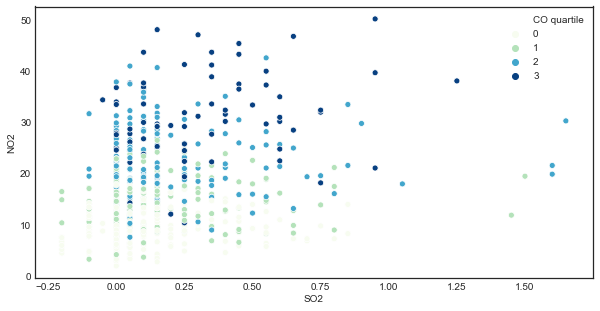

In [18]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                  data = des_moines,
                palette = 'GnBu');

By simplifying the color encoding to just four distinct values, you get a clear picture of the patterns between $CO$, $SO_2$, and $NO_2$. Here you see the low quartiles of $CO$ seem to relate with $NO_2$ and appear much less related to the $SO_2$ values. By categorizing the continuous color variable, you allow the viewer to investigate patterns along a third variable in a clear and simple way at the expense of some precision: a tradeoff that is often worth it.

### Choosing the right variable to encode with color
You're tasked with visualizing pollution values for Long Beach and nearby cities over time. The supplied code makes the below (hard-to-read plot), which consists of maximum pollution values (provided as `max_pollutant_values`) with the bars colored by the city.

In [19]:
max_pollutant_values = pd.read_csv('./dataset/max_pollutant_values.csv', index_col=0)
max_pollutant_values.head()

city  year pollutant state    value  month  day
0  Cincinnati  2012        CO  Ohio    1.195      2   60
1  Cincinnati  2012       NO2  Ohio   43.000      2   60
2  Cincinnati  2012        O3  Ohio    0.040      2   60
3  Cincinnati  2012       SO2  Ohio  102.350      2   60
4  Cincinnati  2013        CO  Ohio    1.320     12  365

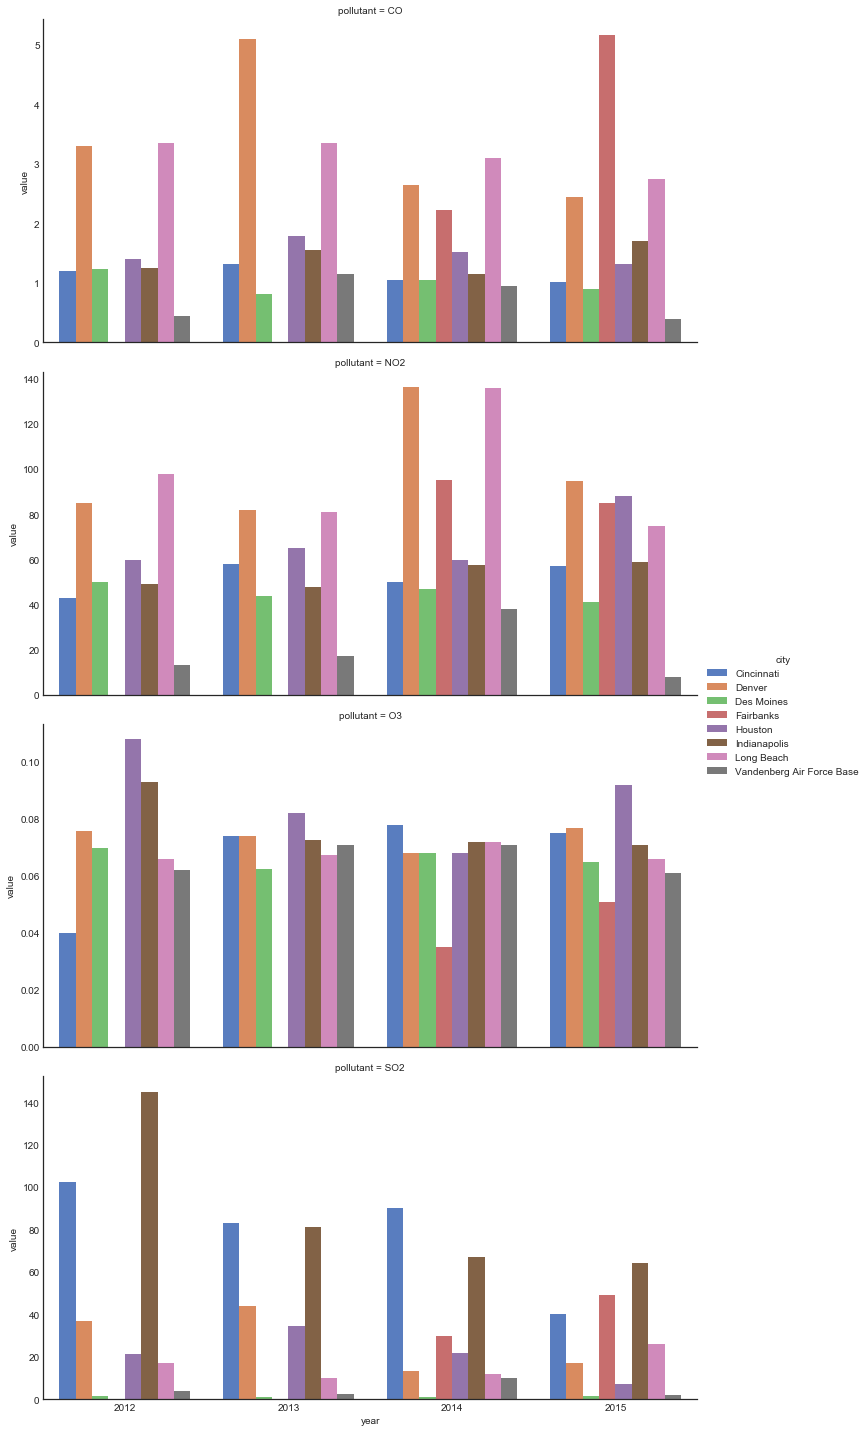

In [20]:
# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver', 
          'Indianapolis', 'Des Moines', 'Cincinnati', 'Houston']

# Filter data to desired cities
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

# Swap city and year encodings
sns.catplot(x = 'year', hue = 'city',
              y = 'value', row = 'pollutant',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'muted',
              sharey = False, kind = 'bar', aspect=2);

You can quickly improve this with a few tweaks. By modifying the cities shown to only those in the western half of the country you will avoid clutter. Next, swapping the color-encoding from city to year allows you to use an ordinal palette, saving the reader from continually referring to the legend to check which color corresponds to which city.

In [29]:
# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver']

# Filter data to desired cities
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

# Swap city and year encodings
sns.catplot(x = 'city', hue = 'year',
              y = 'value', row = 'pollutant',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'BuGn',
              sharey = False, kind = 'bar');

Wonderful! By simply switching just a few values, the plot is much clearer, and the presentation has more impact. Also, the use of hue as the years go on puts a greater emphasis on the later (more recent) years.